In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np
from data import photometry_data, meerkat_data, bran_disc, t_neutrino, vla_data, ami_data, xray_data, xray_ul_data, t_peak_mjd, gamma_data, gamma_deintegrate
from astropy import constants as const
from flux_utils import flux_conversion, convert_radio, colors, bands
from plots import big_fontsize, fig_width
from astropy.time import Time

In [15]:
t = ami_data["Start Date"][0]
print(t)
date = "T".join(["-".join(t.split(" ")[0].split("/")[::-1]), t.split(" ")[1]])
print(date)
print(Time(data, format="isot"))
# ami_times = [Time]

05/21/2019 04:08:27
2019-21-05T04:08:27


ValueError: Input values did not match the format class isot:
TypeError: Input values for isot class must be strings

<Figure size 432x288 with 0 Axes>

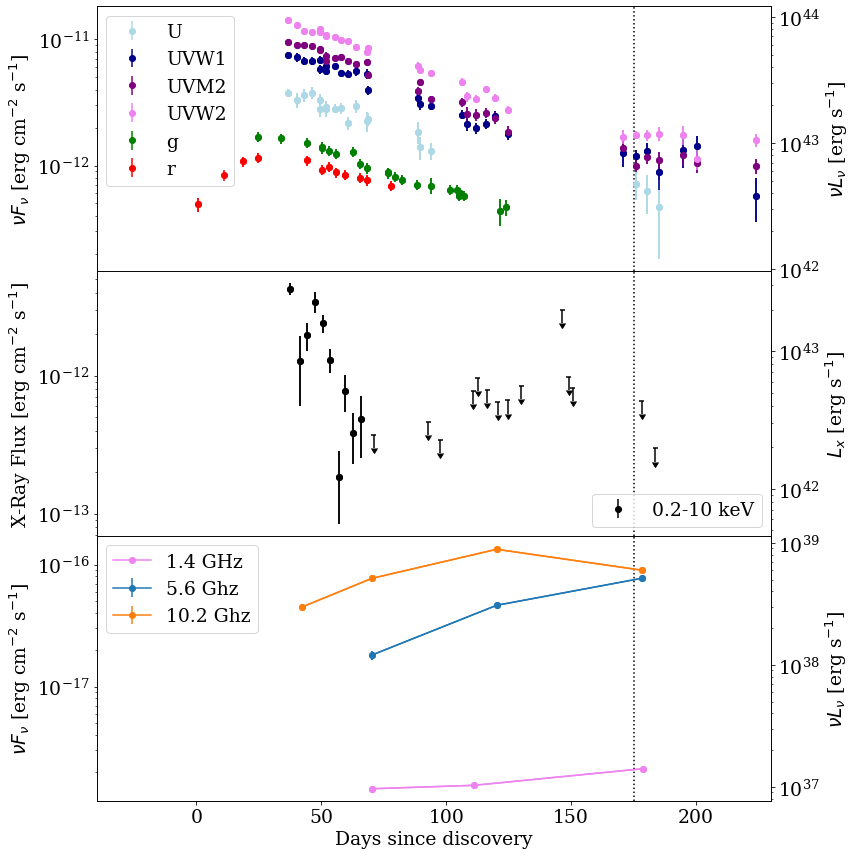

In [3]:
times = []
delta_lum = []
            
plt.tight_layout()

plt.figure(figsize=(fig_width * 2., fig_width * 2.))

ax1 = plt.subplot(311)
ax1b = ax1.twinx()

# Plot luminosity

t_offset = bran_disc.mjd - t_peak_mjd.mjd

for band in bands:
    if band in bands:
        c = colors[band]
        data = photometry_data[photometry_data["band"] == band]
        data = data[data["lum"] > 0.]
        wl = bands[band].to("m")
        f = (const.c / wl).to("GHz")
        flux = flux_conversion * data["lum"]
        
        for x in ["g", "r"]:
            if x in band:
                band = x
        
        ax1b.errorbar(data["#day_since_peak"] - t_offset, data["lum"], yerr=data["err_lum"], color=c,  fmt='o', label=band)
        ax1.errorbar(data["#day_since_peak"] - t_offset, flux, yerr=flux_conversion *data["err_lum"], color=c,  fmt='o', label=band)

ax1.set_ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax1b.set_ylabel(r"$\nu L_{\nu}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax1.legend(fontsize=big_fontsize, loc="upper left")
# ax1.set_ylim(1.5*10**-13, 5.*10**-11)
ax1.set_yscale("log")
ax1b.set_yscale("log")
# ax1b.set_ylim(2.*10**-11/flux_conversion, 2.*10**-9/flux_conversion)

ax1.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)

ax2 = plt.subplot(312, sharex=ax1)
ax2b = ax2.twinx()

ax2.errorbar(xray_data["#MJD"]-bran_disc.mjd, xray_data["flux"], yerr=xray_data["flux_err"],  fmt='o', label="0.2-10 keV", color="k")
ax2b.errorbar(xray_data["#MJD"]-bran_disc.mjd, xray_data["flux"]/flux_conversion, yerr=xray_data["flux_err"]/flux_conversion,  fmt='o', color="k")
ax2.errorbar(xray_ul_data["#MJD"]-bran_disc.mjd, xray_ul_data["flux"], yerr=0.2*xray_ul_data["flux"], xerr=1., uplims=True, fmt=' ', color="k")
# ax3b.errorbar(xray_data["#MJD"]-t_peak_mjd.mjd, 10.**xray_data["log_lum"], yerr=10.**xray_data["log_lum_err"], label="0.2-10 keV",  fmt='o',)

gx = 0.5*(gamma_data["MJD_start"] + gamma_data["MJD_stop"]) - bran_disc.mjd
xerr = 0.5*(gamma_data["MJD_stop"] - gamma_data["MJD_start"])
# print(xerr)
# ax1.errorbar(gx, gamma_data["UL(95)"], xerr=xerr, yerr=0.5*gamma_data["UL(95)"], uplims=True, fmt=' ', label="0.1-800 GeV")
# ax1b.errorbar(gx, gamma_data["UL(95)"]/flux_conversion, xerr=xerr, yerr=0.5*gamma_data["UL(95)"], uplims=True, fmt=' ', label="0.1-800 GeV")


ax2.set_ylabel(r"X-Ray Flux [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax2b.set_ylabel(r"$L_{x}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax2.legend(fontsize=big_fontsize, loc="lower right")
ax2.set_yscale("log")
ax2b.set_yscale("log")
ax2.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax2.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax2b.tick_params(axis='both', which='major', labelsize=big_fontsize)

ax3 = plt.subplot(313, sharex=ax1)
ax3b = ax3.twinx()

ax3.plot(meerkat_data["#mjd"] - bran_disc.mjd, convert_radio(meerkat_data["flux_mJy"], 1.4), marker="o", color="violet", label="1.4 GHz")
ax3b.plot(meerkat_data["#mjd"] - bran_disc.mjd, convert_radio(meerkat_data["flux_mJy"], 1.4)/flux_conversion, marker="o", color="violet", label="1.4 GHz")

for frequency in [5.6, 10.2]:
    data = vla_data[abs(vla_data["frequency"] - frequency) < 0.5]
    data = data.sort_values("mjd")
    ax3.errorbar(data["mjd"]- bran_disc.mjd, convert_radio(data["flux"], frequency),  yerr=convert_radio(data["flux_err"], frequency), marker="o", label="{0} Ghz".format(frequency))
    ax3b.errorbar(data["mjd"]- bran_disc.mjd, convert_radio(data["flux"], frequency)/flux_conversion,  yerr=convert_radio(data["flux_err"], frequency)/flux_conversion, marker="o", label="{0} Ghz".format(frequency))
    
ax3.set_ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax3b.set_ylabel(r"$\nu L_{\nu}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax3.legend(fontsize=big_fontsize)
ax3.set_yscale("log")
ax3b.set_yscale("log")
ax3.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax3.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax3b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax3.set_xlim(-40., 230.)

# ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)
# ax2.scatter(index_times, photon_index)
# ax2.set_ylabel(r"$\frac{d(Log(\nu L_{\nu}))}{d(Log(f))}$", fontsize=12)
# plt.axhline(2.0, color="k", linestyle=":")
ax3.set_xlabel("Days since discovery", fontsize=big_fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.savefig("plots/lightcurve.pdf")